Your name:

points: 50

due by Nov 6. midnight

## HW5:  k nearest neighbors:
  
The heart dataset (given) contains 303 patients  heart-disease diagnoses. Here are the first 5 patients data:

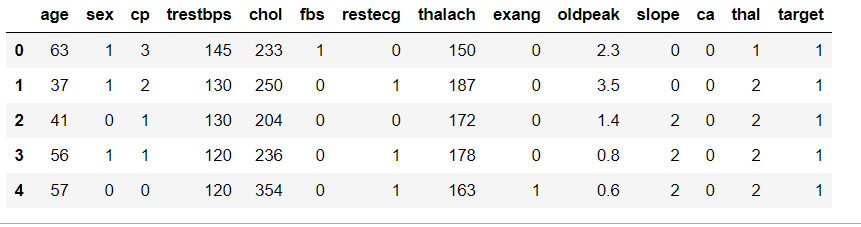
 - Column 0: ID
 
 - Columns 1-13 are some lab results.

 - The last column 'target' shows 1 for 'positive' or 0 for 'negative' 

 - data in a numpy array (code is given)  
 
 
In this homework, we need to use numpy to work on the k nearest neighbors (kNNs) algorithm.  


 ---- 

## Step 1. For one patient (use patient ID)
   
         -  us np to scale the data features to the range [0, 1]: normalization
                   (x - x_min)/(x_max - x_min )

         - ask user to input a patient's id  (int : 0-302),

         - write a function to calculate the Euclidean distance (from this patient to all others)  

           **See the formula below, target col should be exclusive**
    
   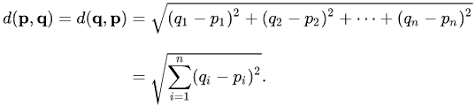
    
          where n is the number of test parameters (n=13).

         - find top 5 (k = 5)  most similar patients based on the shortest distances, and track their diagnoses,

         - use majority vote to predict this patient's diagnosis and compare it with this patient's actual diagnosis:
                 
                   1. if they match, there is no error
                   2. if they do not match, there is an error
         - print out both diagnoses.
         
 

In [1]:
# libraries needed
import pandas as pd 
import numpy as np

# load in the heart disease data into dataframe
data = pd.read_csv("heart.csv")
print(data.head() )

# use numpy array 
heart = np.asarray(data)
heart.shape


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


(303, 14)

# Your code start here 

In [2]:
# (5 points) scaling the data to the range [0, 1]: normalization

heart_scaled = (heart - heart.min(axis=0))/(heart.max(axis=0) - heart.min(axis=0))
    

In [3]:
#check by doing heart.min(axis=0) and same for max
heart_scaled.min(axis=0)
heart_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
# (5 points) distance or similarity (the closer the more similar)

def euclidean(q, p):
    x = heart_scaled[q][:-1]
    y = heart_scaled[p][:-1]

    return np.sqrt(sum((x-y)**2))

print(euclidean(1,5))


1.1594105874543394


In [9]:
# (10 points) define a kNN functin with a given k and pid, return the majority vote

def k_NN(k, pid):

    dis = []                        # keep track of distances
    x = heart_scaled[pid][:-1]      # given patient, x

    for i in range(len(heart_scaled)):      # iterate over all patients and find distance 
        y = heart_scaled[i][:-1]
        d = np.sqrt(sum((x-y)**2))          # distance of patient x from y 

        dis.append(d)                       # append each distance to list of distances
    
    ind = np.argsort(dis)                   # sort dis based on indices 
    
    knn = ind[1:k+1]                        # knn is list of indices of smallest distances within k distances
                                            # knn is from [1:k+1] because 0 is going to be pid 
    #vote
    pos = 0
    neg = 0
    pred = 0
    actual = 0
    for i in knn:
        if i == pid:
            pass
        else:
            if heart_scaled[i][-1] == 1.0:
                pos +=1 
            if heart_scaled[i][-1] == 0.0:
                neg += 1
            # print(heart_scaled[i][-1])
    if pos > neg:
        pred = 1.0
        print(f'Majority vote from {k} nearest neighbors: Positive')
    elif neg > pos:
        pred = 0.0
        print(f'Majority vote from {k} nearest neighbors: Negative')
    else:
        pred = None
        print(f'Majority vote from {k} nearest neighbors: Ambiguous')
    # actual 
    # print(heart_scaled[pid][-1])
    if heart_scaled[pid][-1] == 1.0:
        actual = 1.0
        print('Actual Diagnoses: Positive')
    elif heart_scaled[pid][-1] == 0.0:
        actual = 0.0
        print('Actual Diagnoses: Negative')
    
    return actual, pred                         # return tuple of actual and predicted diagnoses
    
    
    



In [6]:
# (10 points) Test the kNN() function


# (A) for any given patient id and a k value
pid = int(input('What is the Patient ID?:'))
k_NN(5, pid)

# (B) predition for this pid and a k value

# (C) the real diagosis:


Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive


(1.0, 1.0)

### sample run 1
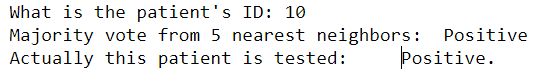

### sample run 2
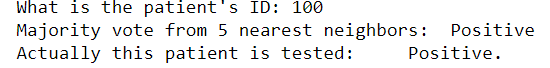

## sample run 3
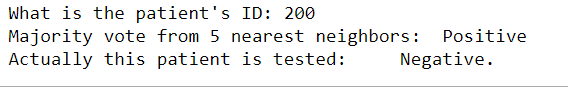

##  Step 2: Run over all patients and check the overall accuracy for k = 5
 
    Based on what you have in step 1, you need to run a loop to check every patient's prediction vs actual diagnosis. 
    Then find the accuracy (total number of correct predictions/total cases)


In [7]:
# (10 points) for any given k, for example k = 10,
# loop over all patients then find the accuracy
accurate = 0
inaccurate = 0
k = 5
for i in range(len(heart_scaled)):     
    if k_NN(k, i)[0] == k_NN(k, i)[1]:
        accurate += 1

rate = accurate/len(heart_scaled)

print("k:", k, "Accuracy Rate:", rate)

        



Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Negative
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Negative
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Positive
Majority vot

## Step 3: Find the best k.
    
    For different K, this accuracy might not be the same. Find the best K which corresponds the highest accuracy.


In [10]:
# (5 points) loop for different k: from 1 to 50 (this loop will take 3-5 minutes)
# find the best k which corresponds the highest accuracy

k_rates = {}
for k in range(51):
    accurate = 0       # Reset accurate count for each k
    for i in range(len(heart_scaled)):     
        if k_NN(k, i)[0] == k_NN(k, i)[1]:
            accurate += 1
    accuracy = accurate/len(heart_scaled)

    k_rates[k] = accuracy

best_k = max(k_rates, key=k_rates.get)

print("The most accurate k is:", best_k)








Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive

In [11]:
print(k_rates)

{0: 0.0, 1: 0.7524752475247525, 2: 0.6468646864686468, 3: 0.8052805280528053, 4: 0.7425742574257426, 5: 0.8250825082508251, 6: 0.7722772277227723, 7: 0.8250825082508251, 8: 0.7821782178217822, 9: 0.8283828382838284, 10: 0.7755775577557755, 11: 0.8052805280528053, 12: 0.768976897689769, 13: 0.7953795379537953, 14: 0.7656765676567657, 15: 0.7887788778877888, 16: 0.7557755775577558, 17: 0.7854785478547854, 18: 0.7425742574257426, 19: 0.7755775577557755, 20: 0.759075907590759, 21: 0.7755775577557755, 22: 0.7524752475247525, 23: 0.7821782178217822, 24: 0.759075907590759, 25: 0.7887788778877888, 26: 0.7755775577557755, 27: 0.801980198019802, 28: 0.7788778877887789, 29: 0.801980198019802, 30: 0.7821782178217822, 31: 0.7986798679867987, 32: 0.7788778877887789, 33: 0.7887788778877888, 34: 0.7722772277227723, 35: 0.7953795379537953, 36: 0.7854785478547854, 37: 0.7986798679867987, 38: 0.7788778877887789, 39: 0.7920792079207921, 40: 0.7755775577557755, 41: 0.7821782178217822, 42: 0.775577557755775

### plotting (optional for you)

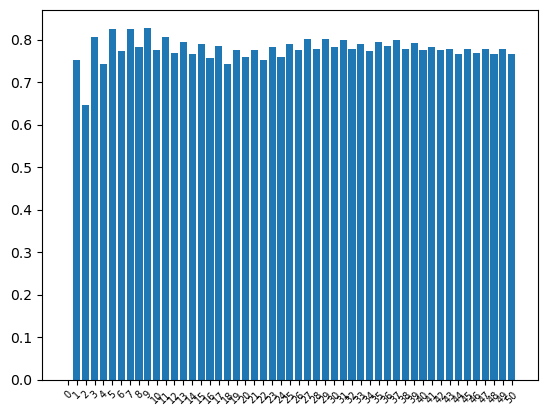

In [12]:
# (0 points) plotting 
import matplotlib.pyplot as plt 
ks = list(k_rates.keys())
values = list(k_rates.values())

plt.bar(range(len(k_rates)), values, tick_label=ks)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize= 7)

plt.show()






### (5 points) comparison: with/without data scaling:

    - rerun your code if you skipped the step of data scaling in the beginning. 
    - what are the differences?

In [13]:
def k_NN_unscaled(k, pid):

    dis = []                        # keep track of distances
    x = heart[pid][:-1]      # given patient, x

    for i in range(len(heart)):      # iterate over all patients and find distance 
        y = heart[i][:-1]
        d = np.sqrt(sum((x-y)**2))          # distance of patient x from y 

        dis.append(d)                       # append each distance to list of distances
    
    ind = np.argsort(dis)                   # sort dis based on indices 
    
    knn = ind[1:k+1]                        # knn is list of indices of smallest distances within k distances
                                            # knn is from [1:k+1] because 0 is going to be pid 
    #vote
    pos = 0
    neg = 0
    pred = 0
    actual = 0
    for i in knn:
        if i == pid:
            pass
        else:
            if heart[i][-1] == 1.0:
                pos +=1 
            if heart[i][-1] == 0.0:
                neg += 1
    
    if pos > neg:
        pred = 1.0
        print(f'Majority vote from {k} nearest neighbors: Positive')
    elif neg > pos:
        pred = 0.0
        print(f'Majority vote from {k} nearest neighbors: Negative')
    else:
        pred = None
        print(f'Majority vote from {k} nearest neighbors: Ambiguous')
    # actual 
   
    if heart[pid][-1] == 1.0:
        actual = 1.0
        print('Actual Diagnoses: Positive')
    elif heart[pid][-1] == 0.0:
        actual = 0.0
        print('Actual Diagnoses: Negative')
    
    return actual, pred  

In [14]:
pid = int(input('What is the Patient ID?:'))
k_NN_unscaled(5, pid)

Majority vote from 5 nearest neighbors: Positive
Actual Diagnoses: Negative


(0.0, 1.0)

In [15]:

k_rates = {}
for k in range(51):
    accurate = 0       # Reset accurate count for each k
    for i in range(len(heart)):     
        if k_NN_unscaled(k, i)[0] == k_NN_unscaled(k, i)[1]:
            accurate += 1
    accuracy = accurate/len(heart)

    k_rates[k] = accuracy

best_k = max(k_rates, key=k_rates.get)

print("The most accurate k is:", best_k)


Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive
Majority vote from 0 nearest neighbors: Ambiguous
Actual Diagnoses: Positive

In [16]:
print(k_rates)

{0: 0.0, 1: 0.5874587458745875, 2: 0.37293729372937295, 3: 0.6270627062706271, 4: 0.4752475247524752, 5: 0.6501650165016502, 6: 0.5181518151815182, 7: 0.6666666666666666, 8: 0.5874587458745875, 9: 0.6567656765676567, 10: 0.5676567656765676, 11: 0.6501650165016502, 12: 0.6006600660066007, 13: 0.6600660066006601, 14: 0.6138613861386139, 15: 0.6567656765676567, 16: 0.6171617161716172, 17: 0.6633663366336634, 18: 0.6105610561056105, 19: 0.6501650165016502, 20: 0.6138613861386139, 21: 0.6468646864686468, 22: 0.6072607260726073, 23: 0.6402640264026402, 24: 0.6270627062706271, 25: 0.66996699669967, 26: 0.6303630363036303, 27: 0.6798679867986799, 28: 0.6534653465346535, 29: 0.6864686468646864, 30: 0.6435643564356436, 31: 0.6963696369636964, 32: 0.6468646864686468, 33: 0.6831683168316832, 34: 0.6402640264026402, 35: 0.6732673267326733, 36: 0.6435643564356436, 37: 0.6732673267326733, 38: 0.6237623762376238, 39: 0.6600660066006601, 40: 0.5973597359735974, 41: 0.6600660066006601, 42: 0.60066006600

The accuracy rates are much lower when the data is not scaled. I found that the optimal k is 31 when the data is not scaled. 

In [ ]:
# end 